**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [14]:
                                                                                                                                #importing libraries
import pandas as pd
import numpy as np
import sys 
import matplotlib.pyplot as plt
import random
from sklearn.metrics.cluster import homogeneity_score,completeness_score
from sklearn.metrics import accuracy_score, f1_score, v_measure_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

Do we need to normalise data?
Yes, it is always better to normalize data.  The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. This makes sure that higher valued columns does not get exrta advantage over small-values columns just because of higher value, even though it is not significant column.

In [2]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

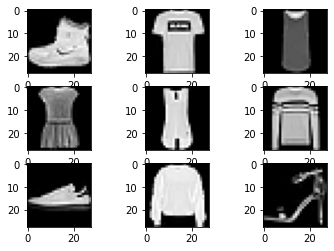

In [4]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
trainX = trainX.reshape(len(trainX), -1)
testX = testX.reshape(len(testX), -1)
print ("train size : ", trainX.shape)
print ("test size : ", testX.shape)

train size :  (60000, 784)
test size :  (10000, 784)


In [6]:
trainy = trainy.reshape(trainy.shape[0],-1)
testy = testy.reshape(testy.shape[0],-1)
testy.shape

(10000, 1)

In [10]:
training_data = np.append(trainX, trainy, axis=1)
testing_data = np.append(testX, testy, axis=1)
testing_data.shape

(10000, 785)

In [61]:
total_data = np.concatenate((training_data, testing_data))
total_data = np.array(total_data, dtype=float)
len_training = int(0.7*total_data.shape[0])
# temp np.array(total_data, )
print("len of training data : ", len_training)
training, test = total_data[:len_training,:], total_data[len_training:,:]
print ("shape of train and test : ", training.shape, " : ", test.shape)

# x=np.concatenate((trainX, testX))
# y=np.concatenate((trainy, testy))
# x = np.array(x, dtype=float)
# y = np.array(y, dtype=float)
# x = x.reshape(len(x), -1)
# print(x.shape)

# test_x = test[:, :-1]
# test_y = test[:,-1]
print ("shape of test x : ", test_x.shape)
print ("shape of test y : ", test_y.shape)

temp_tr = training[:]
temp_ts_x = test[:, :-1]
temp_ts_y = test[:,-1]
# test_temp_x = test_x[:100]
# test_temp_y = test_y[:100]
print ("temp_tr shape : ", temp_tr.shape)
print("temp_ts temp x : ", temp_ts_x.shape)

len of training data :  49000
shape of train and test :  (49000, 785)  :  (21000, 785)
shape of test x :  (21000, 784)
shape of test y :  (21000,)
temp_tr shape :  (49000, 785)
temp_ts temp x :  (21000, 784)


### 2) Implement the K Means algorithm. You need to find the optimal number of clusters using the elbow method and silhouette method.

### 3) Define the initial clusters’ centroids using:
i) Forgy
ii) Random Partition

(Check __init__ method of both Kmeans and KmeansPlusPlus)

In [214]:
#implement Kmeans from scratch
class Kmeans:
    
    def __init__(self, data, n_iter, k, dist_metric, init_centroid_method):
        self.data = data
        self.k = k
        self.n_iter = n_iter
        self.dist_metric = dist_metric
        self.init_centroid_method = init_centroid_method
        

    def init_centroid(self):
        if self.init_centroid_method=="forgy":
            centroids = np.array(random.sample(list(self.data), self.k))
            return centroids[:,:-1]
        
        elif self.init_centroid_method == "random_partition":
            indices = np.random.choice(range(0, self.k), replace = True, size = self.data.shape[0])
            mean = []
            for count in range(self.k):
                mean.append(self.data[indices == count].mean(axis=0))
#             print ("mean : \n", len(mean))
#             print("means 0 : ", len(mean[0]))
#             temp = np.array(mean)
            temp2 = np.concatenate([val[ None, :] for val in mean], axis = 0)
#             if temp==temp2:
#                 print ("gotcha")
#             else:
#                 print("thuuppa")
            
            return temp2[:,:-1]
        
        else:
            print ("wrong method\n")
            return []
        
    def manhattan_dist(self, point1, point2):
        return sum(abs(a-b) for a,b in zip(point1, point2))
    
    
    def eucledian_dist(self, point1, point2):
#         print ("in eucledian : ", point1, "------", point2)
        temp = np.subtract(point1, point2)
#         print("temp : ", temp)
        num = np.dot(temp.T, temp) 
#         print ("num : ", num)
        return np.sqrt(num)
    
    def manhattan_dist(self, point1, point2):
        return np.sum(abs(point1-point2))
    
    def form_cluster(self, centroids):
        
        cluster_dict = {c_id:[] for c_id in range(self.k)}
#         print("in form cluster")
#         print("centroids : ", centroids)
        for d in self.data:
            min_dist = float("inf")
            for c_id in range(len(centroids)):
                centroid = centroids[c_id]
#                 print(d, " ---  ", centroid)
#                 distance = self.eucledian_dist(centroid, d)
                if self.dist_metric == "eucledian":
                    distance = np.linalg.norm(centroid - d[:-1]) 
                else:
                    distance = self.manhattan_dist(centroid,d[:-1])
#                 print ("d : ", distance)
                if distance < min_dist:
                    closest_cluster_id = c_id
                    min_dist = distance
#             print ("min d : ", min_dist)
#             print ("closest cluster id : ", closest_cluster_id)
            cluster_dict[closest_cluster_id].append(d)
        
        return list(cluster_dict.values())
    
    
    def get_new_centroid(self, clusters):
        new_centroids = []

        for cluster in clusters:
#             print ("len of each cluser : ", len(cluster))
            cluster_len = len(cluster)
            if(cluster_len==0):
                cluster.append(self.data[0, :-1])
            sum_ = cluster[0].copy()
            
#             print ("sum _ : ", sum_)
            for row in cluster[1:]:
                sum_ += row
            mean_row = sum_*(1/len(cluster))
            new_centroids.append(mean_row[:-1])
        return np.array(new_centroids)
        
    
    def converge(self, old_centroids, clusters):
        prev_max=0
        while(True):
#             print ("old centroid : ", old_centroids)#, " cluster : ", clusters)
            new_centroids = self.get_new_centroid(clusters)
#             print("new centroids shape " , new_centroids.shape)
            clusters = self.form_cluster(new_centroids)
            
            dist_bw_centroids = map(lambda pt1, pt2: np.linalg.norm(pt1-pt2),new_centroids,old_centroids)
            max_difference = max(dist_bw_centroids)
            difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100
            previous_max_difference = max_difference
            # difference change is nan once the list of differences is all zeroes.
            if np.isnan(difference_change) or self.n_iter==0:
                break
            self.n_iter -=1 
            old_centroids = new_centroids
#             print ("\nhaha\n")
        
        return clusters, new_centroids
                
    def fit(self):
        init_centroids = self.init_centroid()
        clusters = self.form_cluster(init_centroids)
        final_clusters, unlabelled_centroids = self.converge(init_centroids, clusters)
        labelled_centroids = self.label_centroids(final_clusters, unlabelled_centroids)
        sum_wcss = self.wcss(final_clusters, unlabelled_centroids)
        return final_clusters, unlabelled_centroids, labelled_centroids, sum_wcss
    
    def label_centroids(self, clusters, centroids):
        labelled_centroids = list()
        for i in range(len(clusters)):
            cluster = np.array(clusters[i])
#             print ("clustr len : ", len(cluster))
            labels = list(cluster[:,-1])
#             print("labels   : ", (labels))
            most_common_label = max(set(labels), key = labels.count)
#             print ("most common label : ", most_common_label, type(most_common_label))
            labelled_centroid = list(centroids[i])
            labelled_centroid.append(most_common_label)
            labelled_centroids.append(labelled_centroid)
            
        return labelled_centroids
    
    def wcss(self, clusters, centroids):
        sum_ = 0
        for i in range(len(clusters)):
            for row in clusters[i]:
                sum_ += np.linalg.norm(centroids[i] - row[:-1]) 
        return sum_
    
    def predict(self, test_data, labelled_centroids):
        
        predicted_labels = []
        for data in test_data:
            min_dist = float("inf")
            for centroid in labelled_centroids:
#                 print("centroid : ", centroid, "\n", len(centroid))
#                 print("data : ", data, "\n", len(data))
                dist = np.linalg.norm(centroid[:-1]-data)
                if dist < min_dist:
                    min_dist = dist
                    label = centroid[-1]
            predicted_labels.append(label)
            
        return predicted_labels
    
    def get_score(self, predicted, actual):
        acc_score = accuracy_score(actual, predicted)
        hscore = homogeneity_score(actual, predicted)
        c_score = completeness_score(actual, predicted)
        f1_score_ = f1_score(actual, predicted, average='macro')
        v_score = v_measure_score(actual, predicted)
        return acc_score, hscore, c_score, f1_score_, v_score

### Kmeansplusplus class :

In [235]:
#implement Kmeans++ from scratch
class Kmeansplusplus:
#     data = None
#     n_iter = 100
#     k=2
    
    def __init__(self, data, n_iter, k, dist_metric):
        self.data = data
        self.k = k
        self.n_iter = n_iter
        self.dist_metric = dist_metric
        

    def init_centroid(self):
        random_index = np.random.randint(self.data.shape[0])
        centroids = [self.data[random_index,:-1]]
#         print("len of centroid 0 : ", len(centroids[0]))
        for cid in range(self.k-1):
            dist = list()
            for d in self.data:
                min_dist = float("inf")
                for centroid in centroids:
#                     print ("centroid shape : ", centroid.shape)
#                     print ("d shape : ", d[:-1].shape)
                    
                    curr_dist = self.eucledian_dist(centroid, d[:-1])
                    min_dist = min(min_dist, curr_dist)
                
#                 print ("type of dist : ", type(dist))
                dist.append(min_dist)
            
            np_dist = np.array(dist)
            index_max_dist = np.argmax(np_dist)
            next_centroid = self.data[index_max_dist, :-1]
            centroids.append(next_centroid)
        return centroids            
        
        
    def manhattan_dist(self, point1, point2):
        return sum(abs(a-b) for a,b in zip(point1, point2))
    
    
    def eucledian_dist(self, point1, point2):
#         print ("in eucledian : ", point1, "------", point2)
        temp = np.subtract(point1, point2)
#         print("temp : ", temp)
        num = np.dot(temp.T, temp) 
#         print ("num : ", num)
        return np.sqrt(num)
    
    def manhattan_dist(self, point1, point2):
        return np.sum(abs(point1-point2))
    
    def form_cluster(self, centroids):
        
        cluster_dict = {c_id:[] for c_id in range(self.k)}
#         print("in form cluster")
#         print("centroids : ", centroids)
        for d in self.data:
            min_dist = float("inf")
            for c_id in range(len(centroids)):
                centroid = centroids[c_id]
#                 print(d, " ---  ", centroid)
#                 distance = self.eucledian_dist(centroid, d)
                if self.dist_metric == "eucledian":
                    distance = np.linalg.norm(centroid - d[:-1]) 
                else:
                    distance = self.manhattan_dist(centroid,d[:-1])
#                 print ("d : ", distance)
                if distance < min_dist:
                    closest_cluster_id = c_id
                    min_dist = distance
#             print ("min d : ", min_dist)
#             print ("closest cluster id : ", closest_cluster_id)
            cluster_dict[closest_cluster_id].append(d)
        
        return list(cluster_dict.values())
    
    
    def get_new_centroid(self, clusters):
        new_centroids = []
#         print ("get new centorid : >len of Clusters : " , len(clusters))
#         print ("clusters : " , clusters)
        for cluster in clusters:
#             print ("len of each cluser : ", len(cluster))
            cluster_len = len(cluster)
            sum_ = cluster[0].copy()
            
#             print ("sum _ : ", sum_)
            for row in cluster[1:]:
                sum_ += row
            mean_row = sum_*(1.0/len(cluster))
            new_centroids.append(mean_row[:-1])
        return np.array(new_centroids)
        
    
    def converge(self, old_centroids, clusters):
        prev_max=0
        while(True):
#             print ("old centroid : ", old_centroids)#, " cluster : ", clusters)
            new_centroids = self.get_new_centroid(clusters)
#             print("new centroids shape " , new_centroids.shape)
            clusters = self.form_cluster(new_centroids)
            
            dist_bw_centroids = map(lambda pt1, pt2: np.linalg.norm(pt1-pt2),new_centroids,old_centroids)
            max_difference = max(dist_bw_centroids)
            difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100
            previous_max_difference = max_difference
            # difference change is nan once the list of differences is all zeroes.
            if np.isnan(difference_change) or self.n_iter==0:
                break
            self.n_iter -=1 
            old_centroids = new_centroids
#             print ("\nhaha\n")
        
        return clusters, new_centroids
                
    def fit(self):
        init_centroids = self.init_centroid()
#         print ("shape of init centroid : ", init_centroids.shape)
#         print ("initial centroid : ", init_centroids)
        clusters = self.form_cluster(init_centroids)
        final_clusters, unlabelled_centroids = self.converge(init_centroids, clusters)
        labelled_centroids = self.label_centroids(final_clusters, unlabelled_centroids)
        sum_wcss = self.wcss(final_clusters, unlabelled_centroids)
        return final_clusters, unlabelled_centroids, labelled_centroids, sum_wcss
    
    def label_centroids(self, clusters, centroids):
        labelled_centroids = list()
        for i in range(len(clusters)):
            cluster = np.array(clusters[i])
#             print ("clustr len : ", len(cluster))
            labels = list(cluster[:,-1])
#             print("labels   : ", (labels))
            most_common_label = max(set(labels), key = labels.count)
#             print ("most common label : ", most_common_label, type(most_common_label))
            labelled_centroid = list(centroids[i])
            labelled_centroid.append(most_common_label)
            labelled_centroids.append(labelled_centroid)
            
        return labelled_centroids
    
    def wcss(self, clusters, centroids):
        sum_ = 0
        for i in range(len(clusters)):
            for row in clusters[i]:
                sum_ += np.linalg.norm(centroids[i] - row[:-1]) 
        return sum_
    
    def predict(self, test_data, labelled_centroids):
        
        predicted_labels = []
        for data in test_data:
            min_dist = float("inf")
            for centroid in labelled_centroids:
#                 print("centroid : ", centroid, "\n", len(centroid))
#                 print("data : ", data, "\n", len(data))
                dist = np.linalg.norm(centroid[:-1]-data)
                if dist < min_dist:
                    min_dist = dist
                    label = centroid[-1]
            predicted_labels.append(label)
            
        return predicted_labels
    
    def get_score(self, predicted, actual):

        acc_score = accuracy_score(actual, predicted)
        hscore = homogeneity_score(actual, predicted)
        c_score = completeness_score(actual, predicted)
        f1_score_ = f1_score(actual, predicted, average='macro')
        v_score = v_measure_score(actual, predicted)
        return acc_score, hscore, c_score, f1_score_, v_score

### 4) Experiment [Euclidean distance, Manhattan distance], [ Forgy , Random Partition].

### Testing Kmean custom class :

In [65]:
kmeans = Kmeans(temp_tr, 50,10, "eucledian", "forgy")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans.fit()
c = list(clusters)
predicted_labels = kmeans.predict(temp_ts_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans.get_score(predicted_labels, temp_ts_y)
print ("\nScore of model using Eucledian distance and Forgy method : ")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

kmeans = Kmeans(temp_tr, 50,10, "manhattan", "forgy")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans.fit()
c = list(clusters)
predicted_labels = kmeans.predict(temp_ts_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans.get_score(predicted_labels, temp_ts_y)
print ("\n\nScore of model using manhattan distance and Forgy method : ")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

kmeans = Kmeans(temp_tr, 50,10, "eucledian", "random_partition")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans.fit()
c = list(clusters)
predicted_labels = kmeans.predict(temp_ts_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans.get_score(predicted_labels, temp_ts_y)
print ("\n\nScore of model using Eucledian distance and random_partition method : ")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

kmeans = Kmeans(temp_tr, 50,10, "manhattan", "random_partition")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans.fit()
c = list(clusters)
predicted_labels = kmeans.predict(temp_ts_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans.get_score(predicted_labels, temp_ts_y)
print ("\n\nScore of model using manhattan distance and random_partition method : ")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)


Score of model using Eucledian distance and Forgy method : 
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.5826190476190476 0.5041623690952077 0.540710994543599 0.5601574989857723 0.5217974646335451


Score of model using manhattan distance and Forgy method : 
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.4857142857142857 0.47434801460651305 0.5380626856912083 0.423937321649983 0.5042004526748232


Score of model using Eucledian distance and random_partition method : 
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.549952380952381 0.49356241035825527 0.5510998439630538 0.4957218716570451 0.5207466168310565


<ipython-input-63-ee689eb49d69>:106: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100




Score of model using manhattan distance and random_partition method : 
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.5129523809523809 0.495958191294503 0.5578438493024584 0.4540537706992767 0.5250838693917943


### We observe from the above result that homogenity score is best in model using Eucledian distance and random_partition method 

## 5) Plot the error vs number of clusters graph while using the elbow method and silhouette method. Report the optimal number of clusters found.

### Elbow method ( for both kmeans and kmeansplusplus )

In [283]:
#implement elbow method from scratch
def elbow(x, dist_metric, init_centroid_method, kmeans_plus_plus=0):
    wcss = []
    k_vals = range(7,17,1)
    for k in k_vals:
        if kmeans_plus_plus==0:
            model = Kmeans(x, 50, k, dist_metric, init_centroid_method)
        else:
            model = Kmeansplusplus(x, 50, k, dist_metric)
            
        clusters, unlabelled_centroids, labelled_centroids, sum_wcss = model.fit()
#         c = list(clusters)
#         print ("clusters shape :", len(clusters))
        print ("wcss : ", sum_wcss)
        wcss.append(sum_wcss)
 

    plt.plot(k_vals, wcss) 
    plt.xlabel('k-values') 
    plt.ylabel('wcss') 
    plt.title('Elbow graph') 
    plt.show() 

#### To get the best k, running on small dataset, so as to save computational time.

In [136]:
tr_new = training[:100,]

<ipython-input-63-ee689eb49d69>:106: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100


wcss :  141080.96796019215
wcss :  137927.73565391987
wcss :  137507.08618597727
wcss :  134803.20181399994
wcss :  133249.56445115962


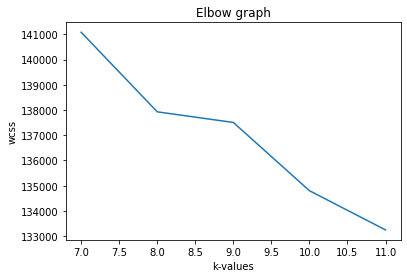

In [137]:
# normal kmeans method
elbow(tr_new , dist_metric="eucledian", init_centroid_method="forgy", kmeans_plus_plus=0)

#### Looking at the graph we see that, k = 9 is the optimal number of clusters in case of kmeans model

<ipython-input-64-457617adb8b7>:108: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100


wcss :  147723.68626348354
wcss :  144377.08066532642
wcss :  139400.04174769443
wcss :  140107.7877749727
wcss :  134862.83663550537


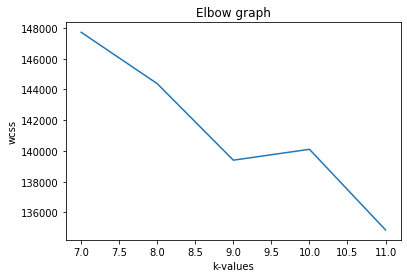

In [140]:
# kmeans++ method
elbow(tr_new, dist_metric="eucledian", init_centroid_method="forgy", kmeans_plus_plus=1)

#### Looking at the above graph we see that, k = 9 is the optimal number of clusters in case of kmeansplusplus model

In [93]:
#implement silhouette method from scratch
def silhouette():



SyntaxError: unexpected EOF while parsing (<ipython-input-93-66a175f7a896>, line 3)

### 6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

### Testing with Sklearn's Kmeans model :

In [169]:
X = temp_tr[:,:-1]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11, random_state=21).fit(X)

predicted = kmeans.predict(temp_ts_x)

# print("predicted : ", predicted)
# print ("temp_ts_x : ", temp_ts_x)

homo_score = homogeneity_score(temp_ts_y, predicted)
print( "homogenity score of sklearn model : ", homo_score)

homogenity score of sklearn model :  0.5261030246887485


### 7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

In [170]:
# Taking small dataset to plot on the graph
unlabelled_data = total_data[:1000,:-1]
unlabelled_data.shape

(1000, 784)

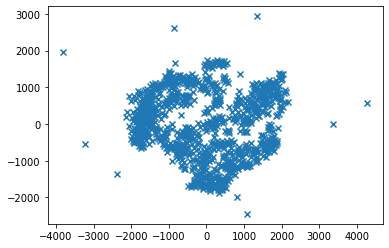

In [171]:
from sklearn.manifold import TSNE
tsne_init = 'pca' 
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
model = TSNE(n_components=2, random_state=1, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(unlabelled_data)
# print (transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

### 8) Implement K-means++, and repeat task 1 to task 7 again.

In [139]:
kmeans_plus_plus = Kmeansplusplus(tr_new, 500, 11, "eucledian")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans_plus_plus.fit()
# c = list(clusters)
# print ("clusters shape :", len(clusters)) 
predicted_labels = kmeans_plus_plus.predict(test_temp_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans_plus_plus.get_score(predicted_labels, test_temp_y)
print ("\n\nscores of Kmeans++ model with Eucledian distance")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

kmeans_plus_plus = Kmeansplusplus(tr_new, 500, 11, "manhattan")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans_plus_plus.fit()
# c = list(clusters)
# print ("clusters shape :", len(clusters)) 
predicted_labels = kmeans_plus_plus.predict(test_temp_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans_plus_plus.get_score(predicted_labels, test_temp_y)
print ("\n\nscores of Kmeans++ model with Manhattan distance")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

<ipython-input-131-039a5e39fbcf>:115: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100


clusters shape : 11
sum wcss :  1372580.9574041863
0.0
5.0
9.0
8.0
8.0
0.0
9.0
scores : 
: 0.56 0.5923453715823296 0.623991243849556 0.5235008412639992 0.6077566366296464


## Part 2 :

In [241]:
import pandas as pd
df = pd.read_csv("data.csv")

In [242]:
df.shape

(59999, 193)

In [243]:
df = df.drop(df.columns[191], axis=1)
df = df.drop(df.columns[0], axis=1)
df.shape

(59999, 191)

In [246]:
data = np.array(df)

print(set(data[:,-1]))

set(y_test[:,0])

{' Ankle Boot',
 ' Bag',
 ' Coat',
 ' Dress',
 ' Pullover',
 ' Sandal',
 ' Shirt',
 ' Sneaker',
 ' T-Shirt',
 ' Trouser'}

In [248]:
y = data[:, -1]

In [249]:
d = {' Ankle Boot':0, ' Bag':1, ' Coat':2, ' Dress':3, ' Pullover':4, ' Sandal':5, ' Shirt':6, ' Sneaker':7, ' T-Shirt':8, ' Trouser':9}
# L = [' Ankle Boot', ' Bag', ' Coat', ' Dress', ' Pullover', ' Sandal', ' Shirt', ' Sneaker', ' T-Shirt', ' Trouser']
y_enc = [d[x] for x in y] # [1, 2, 1, 3, 4, 2]

In [250]:
set(y_enc)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [263]:
x_all = data[:, :-1]

In [264]:
y_enc = np.array(y_enc)
y_enc = y_enc.reshape(-1,1)
y_enc.shape

(59999, 1)

In [265]:
len_all_data = data.shape[0]
t_len = int(0.7*len_all_data)
# data = np.array(data, dtype=float)
# train_data = data[:t_len, :-1]
train_data = np.append(x_all, y_enc, axis=1)
total_data = np.array(train_data, dtype=float)
train_data = total_data[:t_len,:]

test_data = total_data[t_len:, :]

test_x = test_data[:, :-1]
test_y = test_data[:,-1]

In [266]:
x_all.shape

(59999, 190)

In [267]:
print ("train_data : ", train_data.shape)
print ("test_x : ", test_x.shape)
print ("test_y : ", test_y.shape)

train_data :  (41999, 191)
test_x :  (18000, 190)
test_y :  (18000,)


### Kmeans

In [269]:
kmeans = Kmeans(train_data, 50,10, "eucledian", "forgy")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans.fit()
c = list(clusters)
predicted_labels = kmeans.predict(test_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans.get_score(predicted_labels, test_y)
print ("\nScore of Kmeans model using Eucledian distance and Forgy method : ")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)


Score of Kmeans model using Eucledian distance and Forgy method : 
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.5278333333333334 0.46800463549482074 0.5292614825281641 0.4856404887473129 0.49675171498473186


### Kmeansplusplus

In [270]:
kmeans_plus_plus = Kmeansplusplus(train_data, 500, 11, "eucledian")
clusters, unlabelled_centroids, labelled_centroids, sum_wcss = kmeans_plus_plus.fit()
# c = list(clusters)
# print ("clusters shape :", len(clusters)) 
predicted_labels = kmeans_plus_plus.predict(test_x, labelled_centroids)
acc_score, hscore, c_score, f1_score_, v_score = kmeans_plus_plus.get_score(predicted_labels, test_y)
print ("\n\nscores of Kmeans++ model with Eucledian distance")
print("acc_score, hscore, c_score, f1_score_, v_score : \n:", acc_score, hscore, c_score, f1_score_, v_score)

<ipython-input-235-45dd817dba8b>:107: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100




scores of Kmeans++ model with Eucledian distance
acc_score, hscore, c_score, f1_score_, v_score : 
: 0.5230555555555556 0.4661566145602783 0.5277329967738723 0.47934234004803755 0.4950373247943127


### 9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.


In [272]:
# subset of data 
tr_subset = train_data[:1000]

#### Kmeans

<ipython-input-214-606c0055ea6b>:106: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100


wcss :  7691.560414899855
wcss :  7542.7158435179535
wcss :  7193.346005082373
wcss :  7081.663281798943
wcss :  6864.832063676361
wcss :  6663.742584238136
wcss :  6535.214223303293
wcss :  6477.644049907888
wcss :  6324.441473233815
wcss :  6349.185567230667


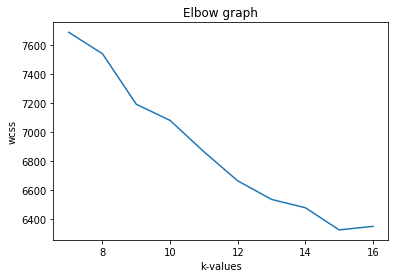

In [284]:
elbow(tr_subset, dist_metric="eucledian", init_centroid_method="forgy", kmeans_plus_plus=0)

#### Kmeans++

#### Looking at the graph we see that, k = 14 is the optimal number of clusters in case of kmeans model

<ipython-input-235-45dd817dba8b>:107: RuntimeWarning: invalid value encountered in double_scalars
  difference_change = abs((max_difference-prev_max)/np.mean([prev_max,max_difference])) * 100


wcss :  7793.788521716078
wcss :  7398.480991328922
wcss :  7235.160235673526
wcss :  7134.645876904273
wcss :  6892.371950852531
wcss :  6886.266763236504
wcss :  6509.4201347355765
wcss :  6470.068744360692
wcss :  6414.105039503655
wcss :  6332.933997360785


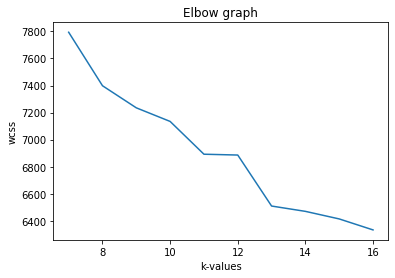

In [285]:
elbow(tr_subset, dist_metric="eucledian", init_centroid_method="forgy", kmeans_plus_plus=1)

#### Looking at the graph we see that, k = 13 is the optimal number of clusters in case of kmeans model

### 10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

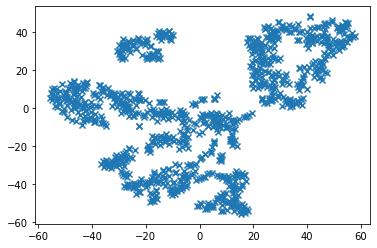

In [286]:
# Taking small dataset to plot on the graph
unlabelled_data = tr_subset[:1000,:-1]
unlabelled_data.shape

from sklearn.manifold import TSNE
tsne_init = 'pca' 
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
model = TSNE(n_components=2, random_state=1, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(unlabelled_data)
# print (transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

### 11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why? Note: If the model takes a lot of time to train you can use MiniBatchKMeans.